In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [93]:
# Read in the data
df_1 = pd.read_csv('data.csv')
df_2 = pd.read_csv('data 2.csv')
df_3 = pd.read_csv('data 3.csv')
df_4 = pd.read_csv('data 4.csv')

C:\Users\minht\AppData\Local\Temp\ipykernel_26284\1872373871.py:5: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_4 = pd.read_csv('data 4.csv')


In [94]:
df_1.head()

,Id,Date,Time,Ms,Bus,Driver,ETA,Count,Customer,Device,...,Time point,Time point ID,Syslog ID,Firmware,Firmware ID,Log upload,Log upload ID,Bus update log ID,Created utc,Datetime utc
0,406029029,4/30/2022,18:12:13,825,1535,D66 Thea,NaN,1,usf,APC1-A32334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421767598,NaN,NaN
1,406028335,4/30/2022,18:08:05,572,1534,D61 Rosa,NaN,1,usf,APC1-A322B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421765976,NaN,NaN
2,406027917,4/30/2022,18:03:40,344,1534,D61 Rosa,NaN,4,usf,USF-91142,...,NaN,NaN,NaN,NaN,NaN,4/30/2022 18:05,137334749.0,421764973,NaN,NaN
3,406027641,4/30/2022,18:03:35,625,1534,D61 Rosa,NaN,1,usf,APC1-A322B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421764292,NaN,NaN
4,406027634,4/30/2022,18:03:31,442,1534,D61 Rosa,NaN,1,usf,APC1-A322B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421764276,NaN,NaN


In [95]:
df_1.shape

(143259, 56)

## Start from one day

In [96]:
# As the data is so messy and so many. I'll start with just one day of data

df_1.Date.value_counts() # I'll select the day with most data: 2022-02-09

2/9/2022     3146
3/7/2022     3042
2/10/2022    2962
2/15/2022    2910
3/1/2022     2898
             ... 
2/20/2022     393
4/24/2022     351
3/13/2022     259
3/20/2022     169
3/19/2022     146
Name: Date, Length: 89, dtype: int64

In [112]:
df_02_09 = df_1[df_1.Date == '2/9/2022']

In [114]:
df_02_09.shape

# Export it just to see beter
df_02_09.to_csv('df_02_09.csv', index=False)

# Still alot, will go to one bus specifically

## One bus

In [115]:
df_02_09['Bus ID'].value_counts() # I'll select the bus with most data: 9812

9812    601
9804    549
9807    528
9794    375
9819    278
9796    247
9806    164
9808    137
9811    100
9795     95
9809     69
9802      2
9810      1
Name: Bus ID, dtype: int64

In [116]:
df_02_09_9812 = df_02_09[df_02_09['Bus ID'] == 9812]

df_02_09_9812.shape

df_02_09_9812

# Export it just to see beter
df_02_09_9812.to_csv('df_02_09_9812.csv', index=False)

In [117]:
# Among column, I find 2 drivers in the driver column (for the same bus on same day)

df_02_09_9812.Driver.value_counts()

D14 Nicole    349
D03 Nelson    219
D68 Marc       33
Name: Driver, dtype: int64

In [118]:
# Convert a little
df_02_09_9812.Time = df_02_09_9812.Time.astype('datetime64[ns]')

temp = df_02_09_9812[df_02_09_9812.Driver == 'D14 Nicole']


C:\Users\minht\AppData\Local\Temp\ipykernel_26284\877233898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_02_09_9812.Time = df_02_09_9812.Time.astype('datetime64[ns]')


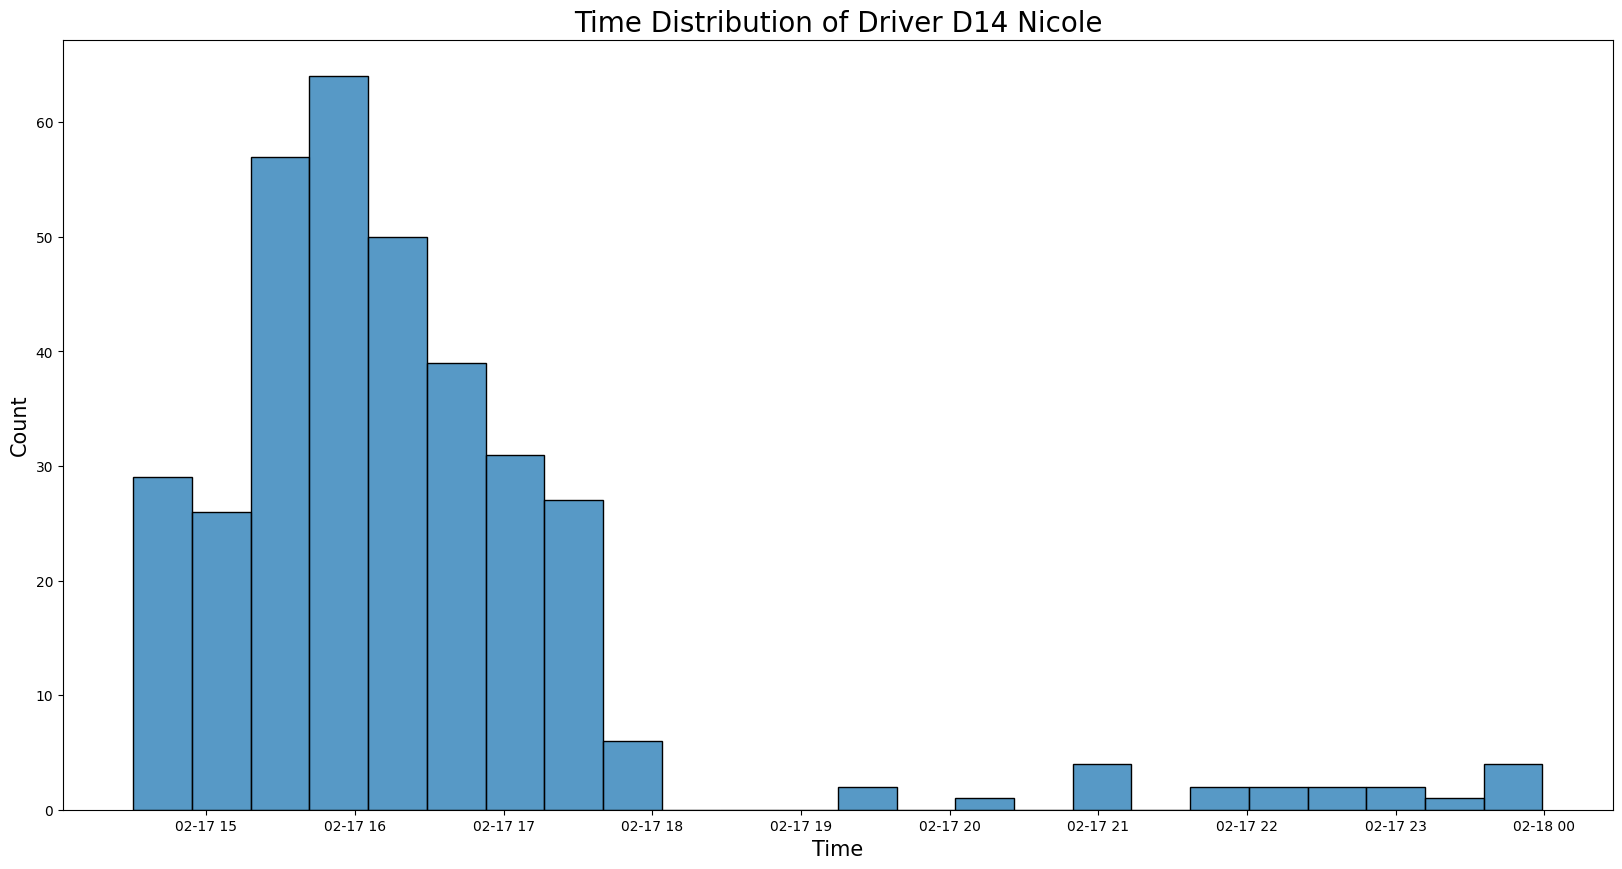

In [119]:
# Plot the time
plt.figure(figsize=(20, 10))

# Plot the distribution of the time
sns.histplot(temp.Time, kde=False, bins=24)

plt.title('Time Distribution of Driver D14 Nicole', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()


In [120]:
# okay, I don't feel so good, let's go back. 

temp = df_02_09_9812[["Time", "Driver"]]
temp

# export it


,Time,Driver
125494,2023-02-17 23:59:17,D14 Nicole
125501,2023-02-17 23:49:58,D14 Nicole
125502,2023-02-17 23:49:24,D14 Nicole
125505,2023-02-17 23:40:52,D14 Nicole
125510,2023-02-17 23:23:22,D14 Nicole
...,...,...
128568,2023-02-17 07:44:15,D03 Nelson
128569,2023-02-17 07:44:11,D03 Nelson
128603,2023-02-17 07:30:16,D03 Nelson
128611,2023-02-17 07:21:17,D03 Nelson


### OKay, so I looked at the excel a bit, and here's what I found:

- the time column, while looked like it's continous, it actually doesn't have any meaning, as it just sort according to time, and not the bus id
- one bus can have serveral drivers throughout the day
- it seems like one bus on one day only have one route -> make sense (the route is also the name of the bus, they can't change lol)

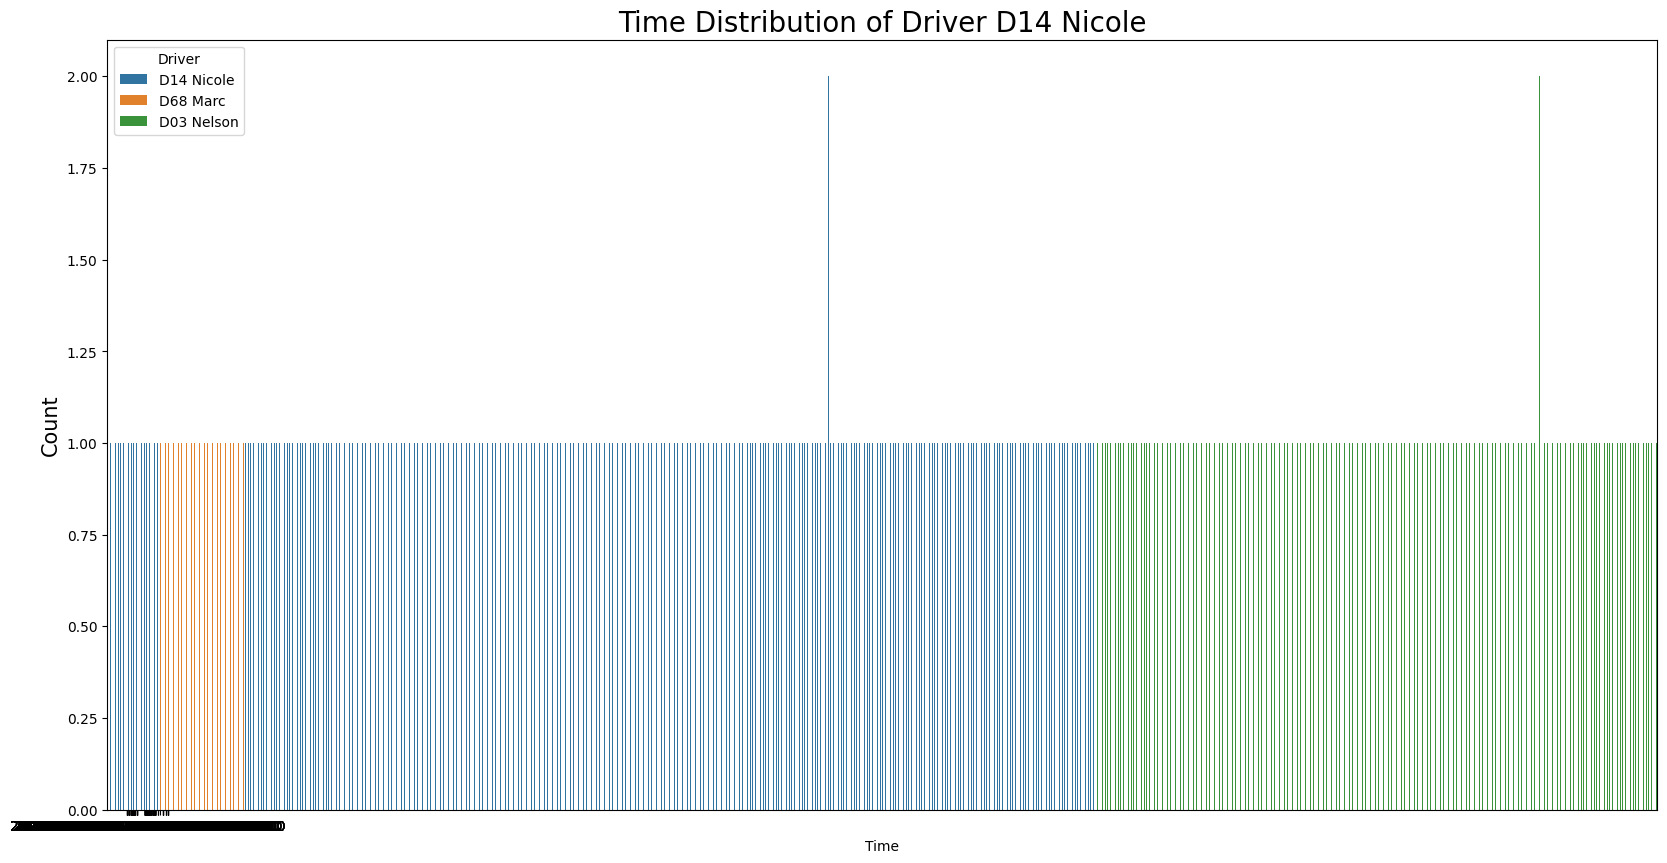

In [121]:
# make seaborn stacked bar chart from Time and Driver
plt.figure(figsize=(20, 10))

# convert the time to hour
sns.countplot(x="Time", hue="Driver", data=temp)

plt.title('Time Distribution of Driver D14 Nicole', fontsize=20)

# on the x-axis only display every 5th label
plt.xticks(temp.Time.dt.hour)
plt.ylabel('Count', fontsize=15)

plt.show()


C:\Users\minht\AppData\Local\Temp\ipykernel_26284\127939563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.Time = temp.Time.dt.hour


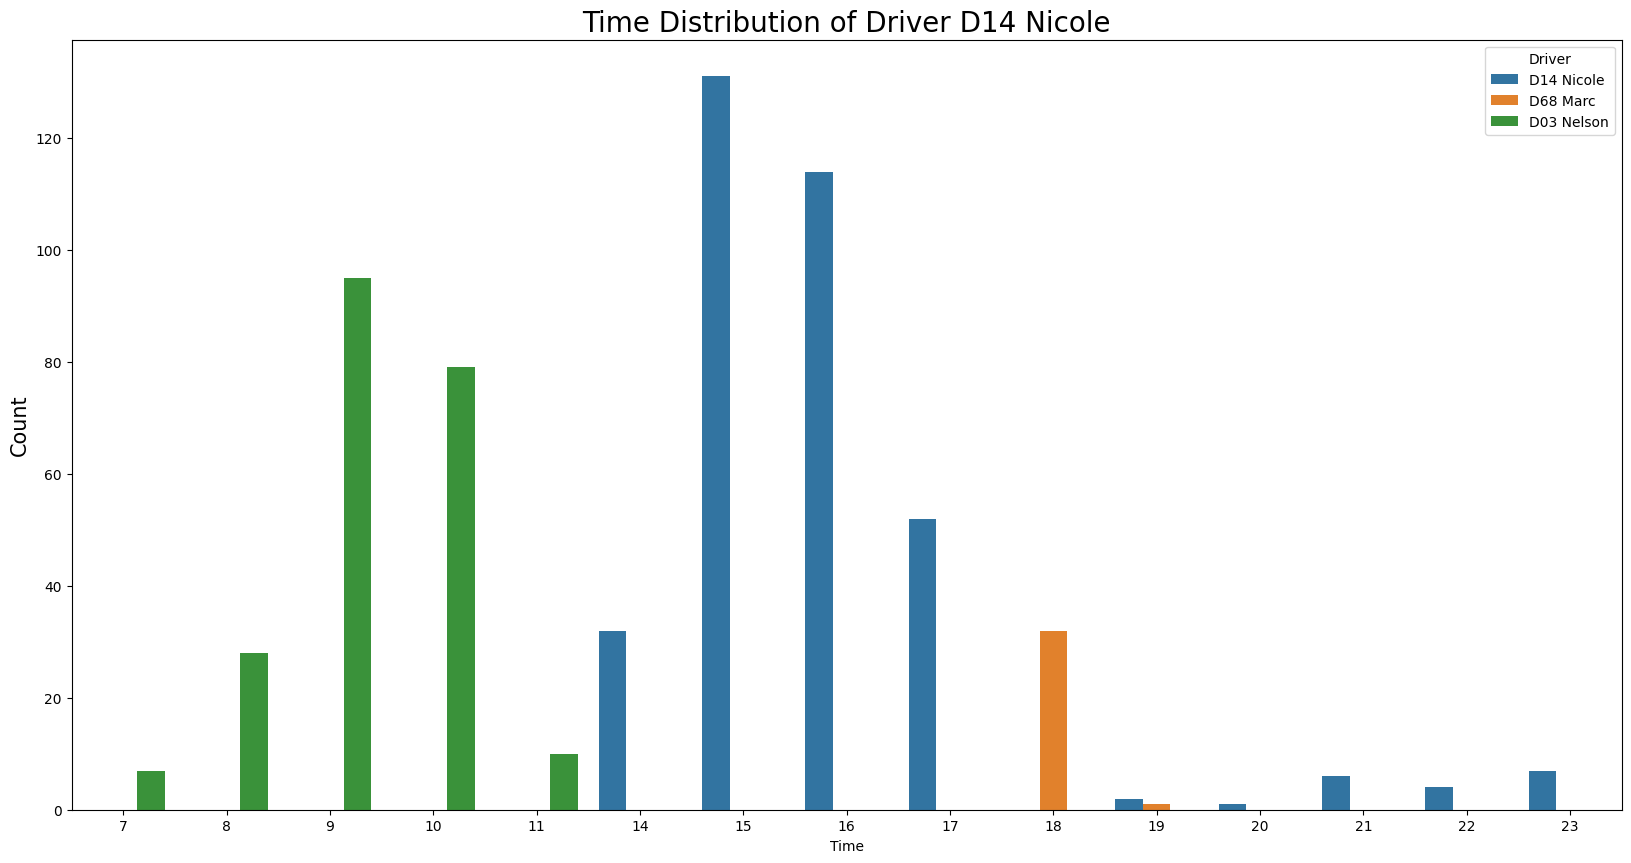

In [122]:
# make seaborn stacked bar chart from Time and Driver
plt.figure(figsize=(20, 10))

# convert the time to hour
temp.Time = temp.Time.dt.hour

sns.countplot(x="Time", hue="Driver", data=temp)

plt.title('Time Distribution of Driver D14 Nicole', fontsize=20)

# on the x-axis only display every 5th label
plt.ylabel('Count', fontsize=15)

plt.show()

In [123]:
# Now add Router column to temp dataframe

temp['Route'] = df_02_09_9812.Route
temp.to_csv('temp.csv', index=False) 



C:\Users\minht\AppData\Local\Temp\ipykernel_26284\2274417502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Route'] = df_02_09_9812.Route


In [127]:
# How about Stop?

temp['Stop'] = df_02_09_9812.Stop
temp.to_csv('temp.csv', index=False)

C:\Users\minht\AppData\Local\Temp\ipykernel_26284\603787452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Stop'] = df_02_09_9812.Stop


In [128]:
# Change a little for the time column. Only get the hour and minute
temp.Time = df_02_09_9812.Time.dt.strftime('%H:%M')

# Export it
temp.to_csv('temp.csv', index=False)


C:\Users\minht\AppData\Local\Temp\ipykernel_26284\3118448529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.Time = df_02_09_9812.Time.dt.strftime('%H:%M')


In [150]:
temp = pd.read_csv('temp.csv')
temp.tail()

,Time,Driver,Route,Stop
596,7:44,D03 Nelson,Green,Stop 00970 - Parking Lot 56
597,7:44,D03 Nelson,Green,Stop 00970 - Parking Lot 56
598,7:30,D03 Nelson,Green,Stop 00214 - Juniper-Poplar
599,7:21,D03 Nelson,Green,Stop 00827 - N 42nd St at Cambridge Woods Dr
600,7:20,D03 Nelson,Green,Stop 00827 - N 42nd St at Cambridge Woods Dr


In [151]:
# Delete consecutive rows with same values
temp_2 = temp

temp_2 = temp.reset_index(drop=True)
# loop through each row with index
index_list = []
for i in range(len(temp_2),-1,-1):
    # if the value in Stop is the same as the value of the last index in the list
    if temp_2.iloc[i-1,3] not in index_list:
        # remove all values from list
        index_list = []
        # add the index to the list
        index_list.append(temp_2.iloc[i-1,3])
    else:
        # delete the row
        temp_2.drop(i-1, inplace=True)

In [154]:
temp_2.to_csv('temp_2.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'temp_2.csv'

In [ ]:
# How to map them accordingly